In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

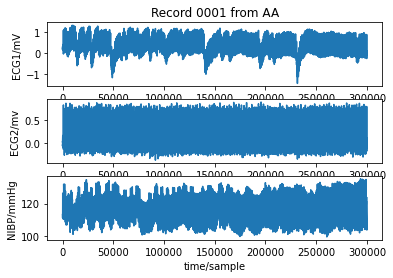

In [2]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('sample-data/0001', sampfrom=0, sampto=300000)
wfdb.plot_wfdb(record=record, title='Record 0001 from AA')
#display(record.__dict__)
#print(type(record))

In [3]:
# Create lists for iteration

vpn_list = list(range(1,71))
vpn_list_str = ['01','02','03','04','05','06','07','08','09'] + list(map(str, range(10, 71)))
vpn_list_data = []
for i in range(len(vpn_list)):
    vpn_list_data_raw = 'sample-data/00{vpn_list_str}'
    vpn_list_data_str = vpn_list_data_raw.format(vpn_list_str = vpn_list_str[i])
    vpn_list_data.append(vpn_list_data_str)
append_str = '.npy'
vpn_list_file = [sub + append_str for sub in vpn_list_data] 

In [4]:
signals, fields = wfdb.rdsamp(vpn_list_data[1], channels=[1], sampfrom=0, sampto=300000)
print(signals)

[[-0.1115041 ]
 [-0.22432981]
 [-0.35164419]
 ...
 [ 0.1200211 ]
 [ 0.18884233]
 [ 0.25134924]]


In [5]:
for i in range(len(vpn_list)):
    signals, fields = wfdb.rdsamp(vpn_list_data[i], channels=[1], sampfrom=0, sampto=300000)
    np.save(vpn_list_file[i], signals)

[[ 0.10901258]
 [ 0.09684208]
 [ 0.08642514]
 ...
 [-0.0646101 ]
 [-0.05592583]
 [-0.04319169]]


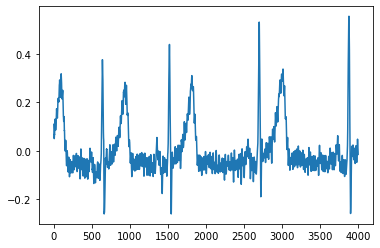

In [12]:
new_num_arr = np.load(vpn_list_file[6]) # load
print(new_num_arr)
plt.plot(new_num_arr[:4000])